# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Diah Afia Safitri
- **Email:** diahafia.safitri@gmail.com
- **ID Dicoding:** diafias

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Produk apa saja yang memiliki jumlah peminat paling banyak bagi customer
- Pertanyaan 2 : Distribusi Penjual dan Pembeli berdasarkan Negara Bagian

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

## Data Wrangling

### Gathering Data, Assessing Data, Cleaning Data

#### Customers

In [4]:
customers = pd.read_csv('customers_dataset.csv')

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [7]:
total_rows, total_attributes = customers.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

customers.head()

Jumlah data: 99441
Jumlah atribut: 5


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
# Memeriksa missing value
print("\nJumlah Missing Value tiap Kolom:")
print(customers.isnull().sum())

# Memeriksa duplikat
print("\nJumlah Duplikat Pada Data:")
print('Info data duplikat:', customers.duplicated().sum())


Jumlah Missing Value tiap Kolom:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah Duplikat Pada Data:
Info data duplikat: 0


In [9]:
# Membuat list untuk menyimpan jumlah outlier dari setiap fitur
outlier_counts = []

# Loop melalui setiap kolom numerik
for col in customers.select_dtypes(include=['int64', 'float64']).columns:
    # Menghitung IQR
    Q1 = customers[col].quantile(0.25)
    Q3 = customers[col].quantile(0.75)
    IQR = Q3 - Q1

    # Menghitung batas atas dan batas bawah
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghitung jumlah outlier
    outlier_count = ((customers[col] < lower_bound) | (customers[col] > upper_bound)).sum()
    outlier_counts.append((col, outlier_count))

# Menampilkan jumlah outlier untuk setiap fitur numerik
for col, count in outlier_counts:
    print(f"Jumlah outlier pada fitur {col}: {count}")


Jumlah outlier pada fitur customer_zip_code_prefix: 0


#### Geolocation

In [10]:
geolocation = pd.read_csv('geolocation_dataset.csv')

In [11]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [12]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [13]:
total_rows, total_attributes = geolocation.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

geolocation.head()

Jumlah data: 1000163
Jumlah atribut: 5


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [14]:
# Memeriksa missing value
print("\nJumlah Missing Value tiap Kolom:")
print(geolocation.isnull().sum())

# Memeriksa duplikat
print("\nJumlah Duplikat Pada Data:")
print('Info data duplikat:', geolocation.duplicated().sum())


Jumlah Missing Value tiap Kolom:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Jumlah Duplikat Pada Data:
Info data duplikat: 261831


In [15]:
# Membuat list untuk menyimpan jumlah outlier dari setiap fitur
outlier_counts = []

# Loop melalui setiap kolom numerik
for col in geolocation.select_dtypes(include=['int64', 'float64']).columns:
    # Menghitung IQR
    Q1 = geolocation[col].quantile(0.25)
    Q3 = geolocation[col].quantile(0.75)
    IQR = Q3 - Q1

    # Menghitung batas atas dan batas bawah
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghitung jumlah outlier
    outlier_count = ((geolocation[col] < lower_bound) | (geolocation[col] > upper_bound)).sum()
    outlier_counts.append((col, outlier_count))

# Menampilkan jumlah outlier untuk setiap fitur numerik
for col, count in outlier_counts:
    print(f"Jumlah outlier pada fitur {col}: {count}")


Jumlah outlier pada fitur geolocation_zip_code_prefix: 0
Jumlah outlier pada fitur geolocation_lat: 168240
Jumlah outlier pada fitur geolocation_lng: 42348


In [16]:
# Menghapus duplikat
geolocation.drop_duplicates(inplace=True)


#### Order Items

In [17]:
order_items = pd.read_csv('order_items_dataset.csv')

In [18]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [20]:
total_rows, total_attributes = order_items.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

order_items.head()

Jumlah data: 112650
Jumlah atribut: 7


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [21]:
# Memeriksa missing value
print("\nJumlah Missing Value tiap Kolom:")
print(order_items.isnull().sum())

# Memeriksa duplikat
print("\nJumlah Duplikat Pada Data:")
print('Info data duplikat:', order_items.duplicated().sum())



Jumlah Missing Value tiap Kolom:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah Duplikat Pada Data:
Info data duplikat: 0


In [22]:
# Membuat list untuk menyimpan jumlah outlier dari setiap fitur
outlier_counts = []

# Loop melalui setiap kolom numerik
for col in order_items.select_dtypes(include=['int64', 'float64']).columns:
    # Menghitung IQR
    Q1 = order_items[col].quantile(0.25)
    Q3 = order_items[col].quantile(0.75)
    IQR = Q3 - Q1

    # Menghitung batas atas dan batas bawah
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghitung jumlah outlier
    outlier_count = ((order_items[col] < lower_bound) | (order_items[col] > upper_bound)).sum()
    outlier_counts.append((col, outlier_count))

# Menampilkan jumlah outlier untuk setiap fitur numerik
for col, count in outlier_counts:
    print(f"Jumlah outlier pada fitur {col}: {count}")


Jumlah outlier pada fitur order_item_id: 13984
Jumlah outlier pada fitur price: 8427
Jumlah outlier pada fitur freight_value: 12134


#### Order payments

In [23]:
order_payments = pd.read_csv('order_payments_dataset.csv')

In [24]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [25]:
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [26]:
total_rows, total_attributes = order_payments.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

order_payments.head()

Jumlah data: 103886
Jumlah atribut: 5


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [27]:
# Memeriksa missing value
print("\nJumlah Missing Value tiap Kolom:")
print(order_payments.isnull().sum())

# Memeriksa duplikat
print("\nJumlah Duplikat Pada Data:")
print('Info data duplikat:', order_payments.duplicated().sum())



Jumlah Missing Value tiap Kolom:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah Duplikat Pada Data:
Info data duplikat: 0


In [28]:
# Membuat list untuk menyimpan jumlah outlier dari setiap fitur
outlier_counts = []

# Loop melalui setiap kolom numerik
for col in order_payments.select_dtypes(include=['int64', 'float64']).columns:
    # Menghitung IQR
    Q1 = order_payments[col].quantile(0.25)
    Q3 = order_payments[col].quantile(0.75)
    IQR = Q3 - Q1

    # Menghitung batas atas dan batas bawah
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghitung jumlah outlier
    outlier_count = ((order_payments[col] < lower_bound) | (order_payments[col] > upper_bound)).sum()
    outlier_counts.append((col, outlier_count))

# Menampilkan jumlah outlier untuk setiap fitur numerik
for col, count in outlier_counts:
    print(f"Jumlah outlier pada fitur {col}: {count}")


Jumlah outlier pada fitur payment_sequential: 4526
Jumlah outlier pada fitur payment_installments: 6313
Jumlah outlier pada fitur payment_value: 7981


#### Order Reviews

In [29]:
order_reviews = pd.read_csv('order_reviews_dataset.csv')

In [30]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [31]:
order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [32]:
total_rows, total_attributes = order_reviews.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

order_reviews.head()

Jumlah data: 99224
Jumlah atribut: 7


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [33]:
# Memeriksa missing value
print("\nJumlah Missing Value tiap Kolom:")
print(order_reviews.isnull().sum())

# Memeriksa duplikat
print("\nJumlah Duplikat Pada Data:")
print('Info data duplikat:', order_reviews.duplicated().sum())



Jumlah Missing Value tiap Kolom:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Jumlah Duplikat Pada Data:
Info data duplikat: 0


In [34]:
# Membuat list untuk menyimpan jumlah outlier dari setiap fitur
outlier_counts = []

# Loop melalui setiap kolom numerik
for col in order_reviews.select_dtypes(include=['int64', 'float64']).columns:
    # Menghitung IQR
    Q1 = order_reviews[col].quantile(0.25)
    Q3 = order_reviews[col].quantile(0.75)
    IQR = Q3 - Q1

    # Menghitung batas atas dan batas bawah
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghitung jumlah outlier
    outlier_count = ((order_reviews[col] < lower_bound) | (order_reviews[col] > upper_bound)).sum()
    outlier_counts.append((col, outlier_count))

# Menampilkan jumlah outlier untuk setiap fitur numerik
for col, count in outlier_counts:
    print(f"Jumlah outlier pada fitur {col}: {count}")


Jumlah outlier pada fitur review_score: 14575


In [35]:
# Mengisi missing value pada fitur kategorikal dengan mode
for col in order_reviews.select_dtypes(include=['object']).columns:
    order_reviews[col].fillna(order_reviews[col].mode()[0], inplace=True)


#### Orders

In [36]:
orders = pd.read_csv('orders_dataset.csv')

In [37]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [38]:
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [39]:
total_rows, total_attributes = orders.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

orders.head()

Jumlah data: 99441
Jumlah atribut: 8


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [40]:
# Memeriksa missing value
print("\nJumlah Missing Value tiap Kolom:")
print(orders.isnull().sum())

# Memeriksa duplikat
print("\nJumlah Duplikat Pada Data:")
print('Info data duplikat:', orders.duplicated().sum())



Jumlah Missing Value tiap Kolom:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Jumlah Duplikat Pada Data:


Info data duplikat: 0


In [41]:
# Membuat list untuk menyimpan jumlah outlier dari setiap fitur
outlier_counts = []

# Loop melalui setiap kolom numerik
for col in orders.select_dtypes(include=['int64', 'float64']).columns:
    # Menghitung IQR
    Q1 = orders[col].quantile(0.25)
    Q3 = orders[col].quantile(0.75)
    IQR = Q3 - Q1

    # Menghitung batas atas dan batas bawah
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghitung jumlah outlier
    outlier_count = ((orders[col] < lower_bound) | (orders[col] > upper_bound)).sum()
    outlier_counts.append((col, outlier_count))

# Menampilkan jumlah outlier untuk setiap fitur numerik
for col, count in outlier_counts:
    print(f"Jumlah outlier pada fitur {col}: {count}")


In [42]:
# Mengisi missing value pada fitur kategorikal dengan mode
for col in orders.select_dtypes(include=['object']).columns:
    orders[col].fillna(orders[col].mode()[0], inplace=True)


#### Product Category Name Translation

In [43]:
product_category_name_translation = pd.read_csv('product_category_name_translation.csv')

In [44]:
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [45]:
total_rows, total_attributes = product_category_name_translation.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

product_category_name_translation.describe()

Jumlah data: 71
Jumlah atribut: 2


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [46]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,beleza_saude,furniture_decor


In [47]:
# Memeriksa missing value
print("\nJumlah Missing Value tiap Kolom:")
print(product_category_name_translation.isnull().sum())

# Memeriksa duplikat
print("\nJumlah Duplikat Pada Data:")
print('Info data duplikat:', product_category_name_translation.duplicated().sum())



Jumlah Missing Value tiap Kolom:
product_category_name            0
product_category_name_english    0
dtype: int64

Jumlah Duplikat Pada Data:
Info data duplikat: 0


In [48]:
# Membuat list untuk menyimpan jumlah outlier dari setiap fitur
outlier_counts = []

# Loop melalui setiap kolom numerik
for col in product_category_name_translation.select_dtypes(include=['int64', 'float64']).columns:
    # Menghitung IQR
    Q1 = product_category_name_translation[col].quantile(0.25)
    Q3 = product_category_name_translation[col].quantile(0.75)
    IQR = Q3 - Q1

    # Menghitung batas atas dan batas bawah
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghitung jumlah outlier
    outlier_count = ((product_category_name_translation[col] < lower_bound) | (product_category_name_translation[col] > upper_bound)).sum()
    outlier_counts.append((col, outlier_count))

# Menampilkan jumlah outlier untuk setiap fitur numerik
for col, count in outlier_counts:
    print(f"Jumlah outlier pada fitur {col}: {count}")


#### Products

In [49]:
products = pd.read_csv('products_dataset.csv')

In [50]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [51]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [52]:
total_rows, total_attributes = products.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

products.head()

Jumlah data: 32951
Jumlah atribut: 9


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [53]:
# Memeriksa missing value
print("\nJumlah Missing Value tiap Kolom:")
print(products.isnull().sum())

# Memeriksa duplikat
print("\nJumlah Duplikat Pada Data:")
print('Info data duplikat:', products.duplicated().sum())



Jumlah Missing Value tiap Kolom:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Jumlah Duplikat Pada Data:
Info data duplikat: 0


In [54]:
# Membuat list untuk menyimpan jumlah outlier dari setiap fitur
outlier_counts = []

# Loop melalui setiap kolom numerik
for col in products.select_dtypes(include=['int64', 'float64']).columns:
    # Menghitung IQR
    Q1 = products[col].quantile(0.25)
    Q3 = products[col].quantile(0.75)
    IQR = Q3 - Q1

    # Menghitung batas atas dan batas bawah
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghitung jumlah outlier
    outlier_count = ((products[col] < lower_bound) | (products[col] > upper_bound)).sum()
    outlier_counts.append((col, outlier_count))

# Menampilkan jumlah outlier untuk setiap fitur numerik
for col, count in outlier_counts:
    print(f"Jumlah outlier pada fitur {col}: {count}")


Jumlah outlier pada fitur product_name_lenght: 290
Jumlah outlier pada fitur product_description_lenght: 2078
Jumlah outlier pada fitur product_photos_qty: 849
Jumlah outlier pada fitur product_weight_g: 4551
Jumlah outlier pada fitur product_length_cm: 1380
Jumlah outlier pada fitur product_height_cm: 1892
Jumlah outlier pada fitur product_width_cm: 912


In [55]:
# Mengisi missing value pada fitur kategorikal dengan mode
for col in products.select_dtypes(include=['object']).columns:
    products[col].fillna(products[col].mode()[0], inplace=True)


In [56]:
# Mengisi missing value pada fitur numerik dengan mean
for col in products.select_dtypes(include=['int64', 'float64']).columns:
    products[col].fillna(products[col].mean(), inplace=True)


#### Sellers

In [57]:
sellers = pd.read_csv('sellers_dataset.csv')

In [58]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [59]:
sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [60]:
total_rows, total_attributes = sellers.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

sellers.head()

Jumlah data: 3095
Jumlah atribut: 4


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [61]:
# Memeriksa missing value
print("\nJumlah Missing Value tiap Kolom:")
print(sellers.isnull().sum())

# Memeriksa duplikat
print("\nJumlah Duplikat Pada Data:")
print('Info data duplikat:', sellers.duplicated().sum())



Jumlah Missing Value tiap Kolom:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Jumlah Duplikat Pada Data:
Info data duplikat: 0


In [62]:
# Membuat list untuk menyimpan jumlah outlier dari setiap fitur
outlier_counts = []

# Loop melalui setiap kolom numerik
for col in sellers.select_dtypes(include=['int64', 'float64']).columns:
    # Menghitung IQR
    Q1 = sellers[col].quantile(0.25)
    Q3 = sellers[col].quantile(0.75)
    IQR = Q3 - Q1

    # Menghitung batas atas dan batas bawah
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghitung jumlah outlier
    outlier_count = ((sellers[col] < lower_bound) | (sellers[col] > upper_bound)).sum()
    outlier_counts.append((col, outlier_count))

# Menampilkan jumlah outlier untuk setiap fitur numerik
for col, count in outlier_counts:
    print(f"Jumlah outlier pada fitur {col}: {count}")


Jumlah outlier pada fitur seller_zip_code_prefix: 0


## Exploratory Data Analysis (EDA)

In [64]:
# Gabungkan data dari ORDER ITEMS dan PRODUCTS
order_product = pd.merge(order_items[['order_id','order_item_id', 'product_id', 'seller_id']], products[['product_id', 'product_category_name']], on='product_id')

# Tampilkan hasil gabungan dengan fitur yang dipilih
order_product

,order_id,order_item_id,product_id,seller_id,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff
...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,ferramentas_jardim
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,moveis_decoracao
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,relogios_presentes
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,esporte_lazer


In [65]:
# Menggabungkan berdasarkan product_id dan product_category_name, kemudian menghitung jumlah
order_product_combined = order_product.groupby(['product_id', 'product_category_name', 'seller_id']).size().reset_index(name='jumlah')

# Mengurutkan DataFrame berdasarkan kolom 'jumlah' dari yang terbesar hingga terkecil
order_product_combined_sorted = order_product_combined.sort_values(by='jumlah', ascending=False)
order_product_combined_sorted

,product_id,product_category_name,seller_id,jumlah
23120,aca2eb7d00ea1a7b8ebd4e68314663af,moveis_decoracao,955fee9216a65b617aa5c0531780ce60,527
8986,422879e10f46682990de24d770e7f83d,ferramentas_jardim,1f50f920176fa81dab994f9023523100,484
20647,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,4a3ca9315b744ce9f8e9374361493884,482
7686,389d119b48cf3043d311335e499d9c6b,ferramentas_jardim,1f50f920176fa81dab994f9023523100,392
7384,368c6c730842d78016ad823897a372db,ferramentas_jardim,1f50f920176fa81dab994f9023523100,388
...,...,...,...,...
14590,6bc9ae87edf6ad4063076624b8ad0268,relogios_presentes,7e93a43ef30c4f03f38b393420bc753a,1
14588,6bc7beedbbaefd0dc541f15678e48608,utilidades_domesticas,98dac6635aee4995d501a3972e047414,1
14587,6bc53d46b55a38602aad862a37153ea6,casa_conforto,2528513dd95219a6013d4d05176e391a,1
14586,6bbec39677851d73c72b2e8f256f34ad,automotivo,abbf6046bbdf1028606a5bc7f00c99e7,1


In [66]:
# Kelompokkan data berdasarkan product_category_name dan hitung jumlah total setiap kategori produk
category_product_count = order_product_combined_sorted.groupby('product_category_name')['jumlah'].sum().reset_index(name='jumlah_total')

# Urutkan DataFrame berdasarkan jumlah total setiap kategori produk dari yang terbesar ke terkecil
category_product_count_sorted = category_product_count.sort_values(by='jumlah_total', ascending=False)

category_product_count_sorted

,product_category_name,jumlah_total
13,cama_mesa_banho,12718
11,beleza_saude,9670
32,esporte_lazer,8641
54,moveis_decoracao,8334
44,informatica_acessorios,7827
...,...,...
17,cds_dvds_musicais,14
46,la_cuisine,14
60,pc_gamer,9
37,fashion_roupa_infanto_juvenil,8


In [67]:
merged_data_final = pd.merge(category_product_count_sorted, product_category_name_translation, on='product_category_name', how='left')
merged_data_final['product_category_name_english'].fillna(merged_data_final['product_category_name'], inplace=True)
# Tampilkan hasil
print(merged_data_final)

            product_category_name  jumlah_total product_category_name_english
0                 cama_mesa_banho         12718                bed_bath_table
1                    beleza_saude          9670                 health_beauty
2                   esporte_lazer          8641                sports_leisure
3                moveis_decoracao          8334              moveis_decoracao
4          informatica_acessorios          7827         computers_accessories
..                            ...           ...                           ...
68              cds_dvds_musicais            14             cds_dvds_musicals
69                     la_cuisine            14                    la_cuisine
70                       pc_gamer             9                      pc_gamer
71  fashion_roupa_infanto_juvenil             8     fashion_childrens_clothes
72             seguros_e_servicos             2         security_and_services

[73 rows x 3 columns]


In [68]:
total_jumlah = merged_data_final['jumlah_total'].sum()
print("Total jumlah dari semua nilai dalam fitur 'jumlah':", total_jumlah)

Total jumlah dari semua nilai dalam fitur 'jumlah': 112650


In [69]:
# Hitung jumlah seller di setiap state
seller_state_count = sellers['seller_state'].value_counts().reset_index()
seller_state_count.columns = ['state', 'seller_count']

# Hitung jumlah customer di setiap state
customer_state_count = customers['customer_state'].value_counts().reset_index()
customer_state_count.columns = ['state', 'customer_count']

# Gabungkan hasil kelompok dari kedua DataFrame
merged_state_counts = pd.merge(seller_state_count, customer_state_count, on='state', how='outer')

# Isi nilai NaN dengan 0
merged_state_counts.fillna(0, inplace=True)

# Hitung total seller dan customer
merged_state_counts['total'] = merged_state_counts['seller_count'] + merged_state_counts['customer_count']

# Urutkan hasil berdasarkan total
merged_state_counts_sorted = merged_state_counts.sort_values(by='total', ascending=False)

# Tampilkan hasil
print(merged_state_counts_sorted)


   state  seller_count  customer_count    total
0     SP        1849.0           41746  43595.0
4     RJ         171.0           12852  13023.0
2     MG         244.0           11635  11879.0
5     RS         129.0            5466   5595.0
1     PR         349.0            5045   5394.0
3     SC         190.0            3637   3827.0
9     BA          19.0            3380   3399.0
7     DF          30.0            2140   2170.0
6     GO          40.0            2020   2060.0
8     ES          23.0            2033   2056.0
11    PE           9.0            1652   1661.0
10    CE          13.0            1336   1349.0
22    PA           1.0             975    976.0
15    MT           4.0             907    911.0
20    MA           1.0             747    748.0
14    MS           5.0             715    720.0
12    PB           6.0             536    542.0
18    PI           1.0             495    496.0
13    RN           5.0             485    490.0
23    AL           0.0             413  

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa saja yang memiliki jumlah peminat paling banyak bagi customer

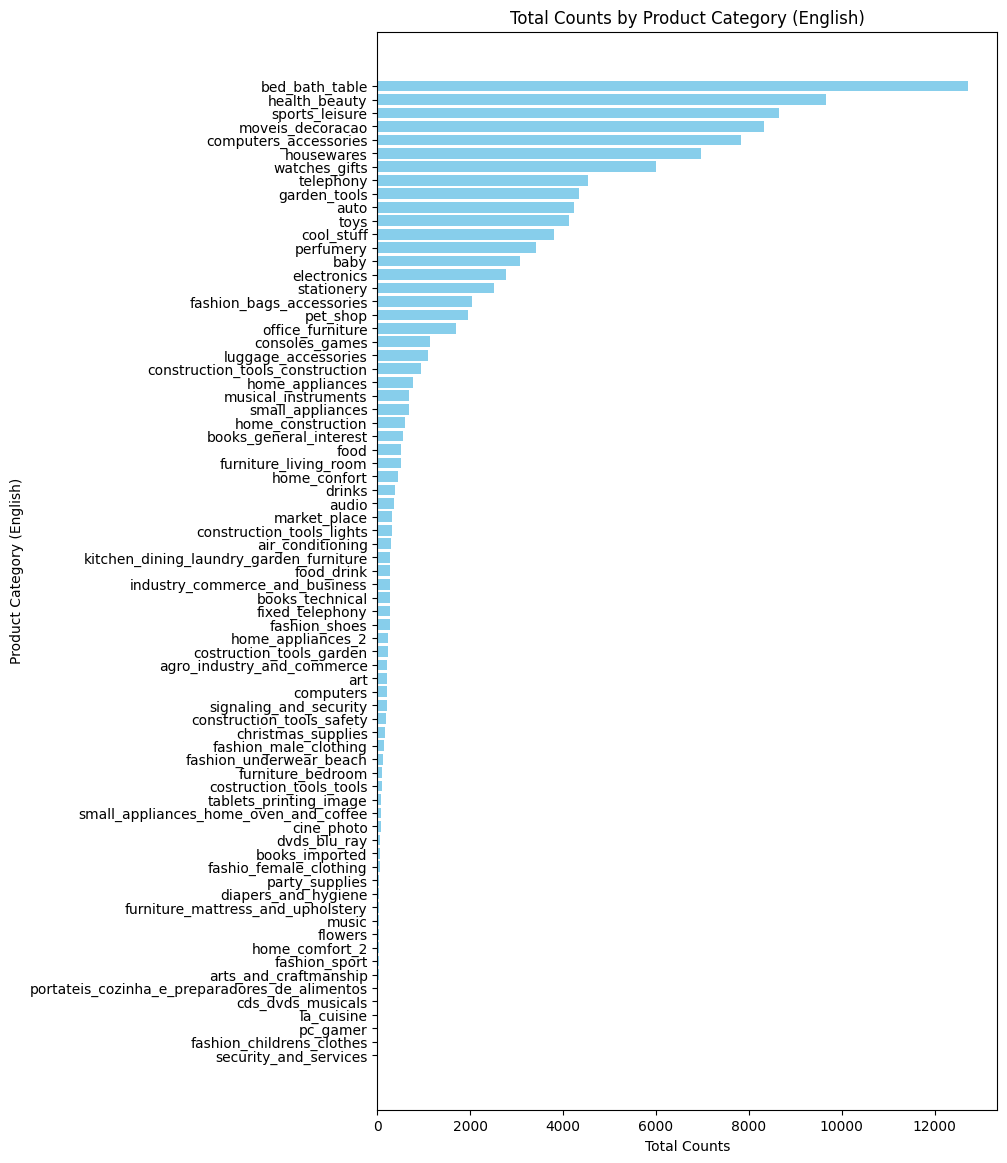

In [70]:
import matplotlib.pyplot as plt

# Data
categories = merged_data_final['product_category_name_english']
total_counts = merged_data_final['jumlah_total']

# Plot
plt.figure(figsize=(8, 14))
plt.barh(categories, total_counts, color='skyblue')
plt.xlabel('Total Counts')
plt.ylabel('Product Category (English)')
plt.title('Total Counts by Product Category (English)')
plt.gca().invert_yaxis()  
plt.show()


### Pertanyaan 2: Bagaimana persebaran penjual dan pembeli, kebanyakan mereka berasal dari negara apa?

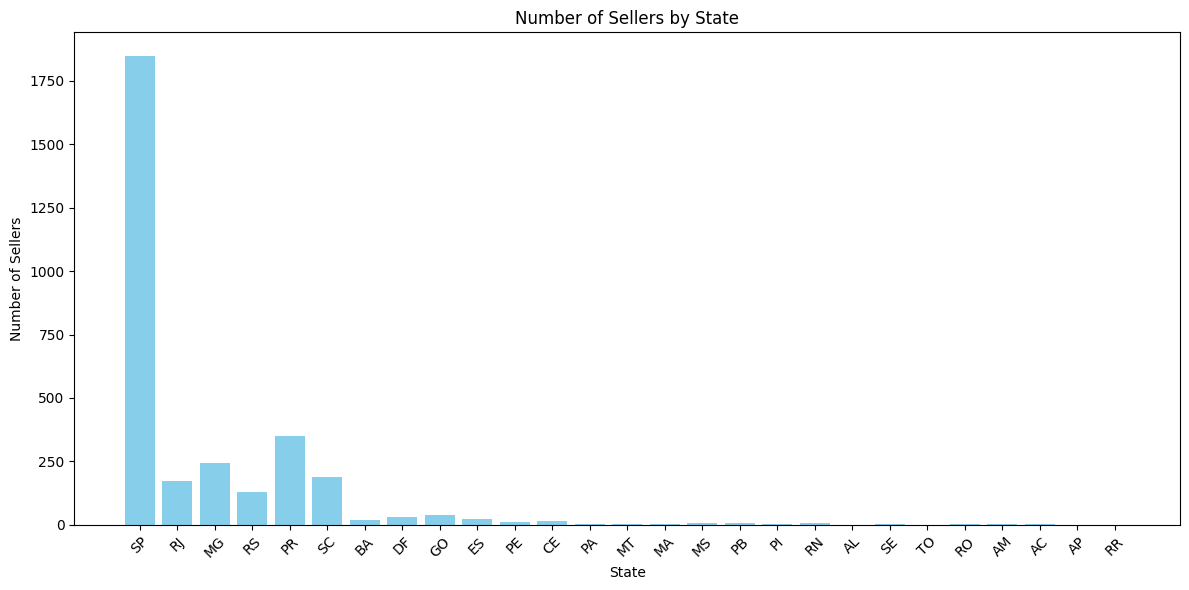

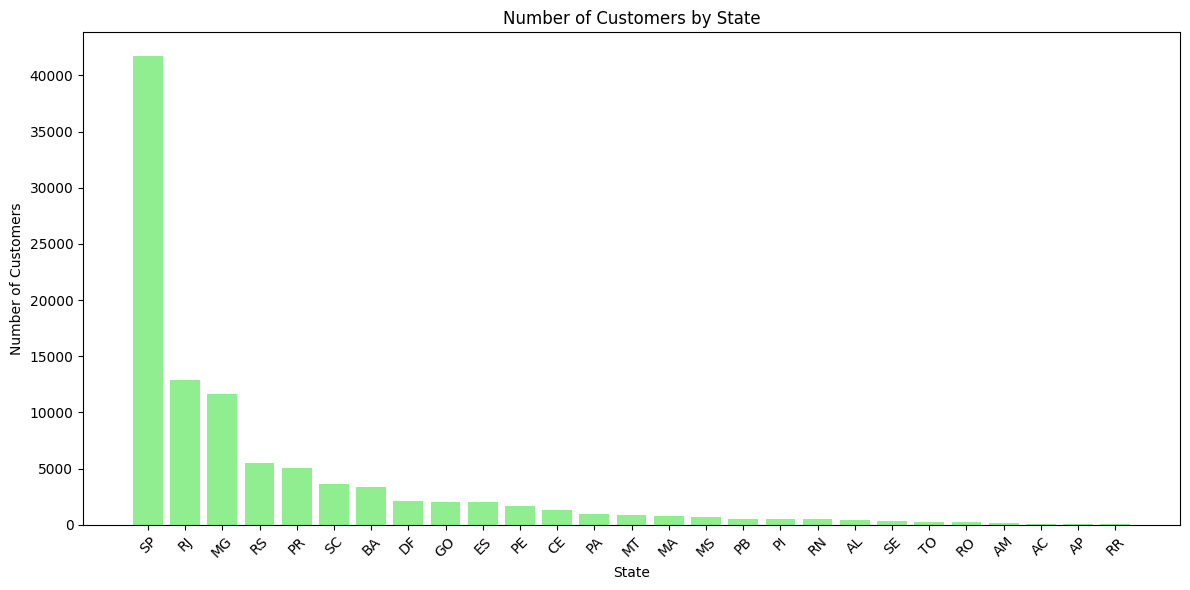

In [71]:
import matplotlib.pyplot as plt

# Data
states = merged_state_counts_sorted['state']
seller_counts = merged_state_counts_sorted['seller_count']
customer_counts = merged_state_counts_sorted['customer_count']

# Plot untuk seller
plt.figure(figsize=(12, 6))
plt.bar(states, seller_counts, color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Sellers')
plt.title('Number of Sellers by State')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar tidak bertabrakan
plt.tight_layout()

# Tampilkan plot untuk seller
plt.show()

# Plot untuk customer
plt.figure(figsize=(12, 6))
plt.bar(states, customer_counts, color='lightgreen')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by State')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar tidak bertabrakan
plt.tight_layout()

# Tampilkan plot untuk customer
plt.show()


## Conclusion

- Conclution pertanyaan 1 = 
    Dalam proses jual beli yang terjadi pada e-commerse ini terdapat berbagai varian produk. Total terdapat 73 produk. Kemudian total order item yang dilakukan customer sebanyak 112650. Untuk persebaran produk nya dimana produk mana saja yang paling sering dibeli. Pada urutan pertama ada produk cama_mesa_banho / bed_bath_table dengan total sekitar 12718, urutan kedua ada beleza_saude / health_beauty sekitar 9670 dan terakhir ada esporte_lazer / sports_leisure sekitar 8641 dan seterusnya
- Conclution pertanyaan 2 = 
    Persebaran seller dan customer di berbagai negara. Untuk yang seller, negara paling banyak adalah negara SP, kemudia ada PR, ketiga ada MG, dan seterusnya. Lalu untuk persebaran customer juga yang tertinggi ada di negara SP, lalu di RJ, ketiga di MG dan seterusnya